In [6]:
import os
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

from keras.utils import to_categorical           # Library for One Hot Encoding
import keras.preprocessing.image as img


In [7]:
# !pwd

In [8]:
# Import Dataset
file_path = os.path.join("../Resources","fashion_mnist_test.csv")
df_testing=pd.read_csv(file_path)

In [9]:
df_testing.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Import Dataset
file_path = os.path.join("../Resources","fashion-mnist_train.csv")
df_training=pd.read_csv(file_path)

In [11]:
df_training.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
training_images = np.array(df_training.iloc[0:,1:])
training_images = training_images.reshape(len(training_images), 28,28) 
training_images = training_images.astype('float32')
training_labels = np.array(df_training.iloc[:,0])
training_labels = to_categorical(training_labels) 

In [13]:
testing_images = np.array(df_testing.iloc[0:,1:])
testing_images = testing_images.reshape(len(testing_images), 28,28)
testing_images = testing_images.astype('float32')
testing_labels = df_testing.iloc[:,0]

test_for_pred = testing_images  

In [14]:
test_labels_for_pred = testing_labels
testing_labels = to_categorical(testing_labels)

In [15]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [16]:
training_images.shape

(60000, 28, 28)

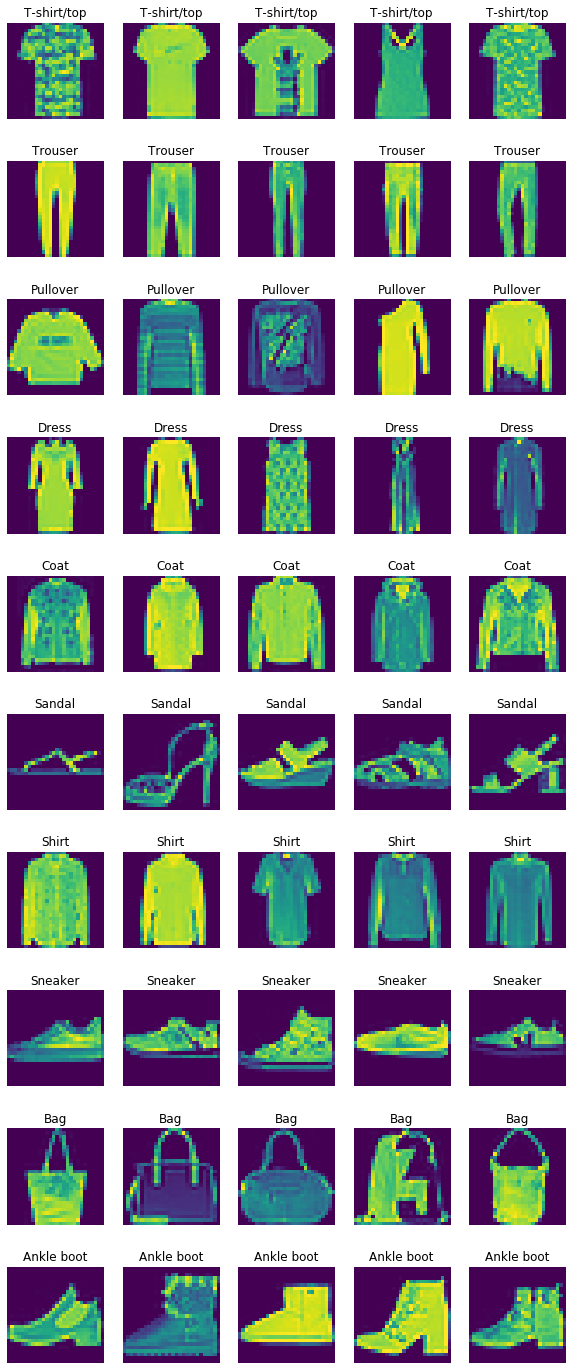

In [17]:
fig, ax = plt.subplots(10,5, figsize = (10,25))
for i,c_name in enumerate(class_names):
    temp = df_training[df_training.iloc[:,0] == i].head(5)
    for k in range(5):
        ax[i,k].imshow(np.array(temp.iloc[k,1:]).reshape(28,28))
        ax[i,k].axis('off')
        ax[i,k].grid(False)
        ax[i,k].title.set_text(str(c_name)) 

In [36]:
pixel_img = img.load_img('../input/pixel-pictures/training_images1.PNG')
np.set_printoptions(linewidth = 200)
fig, ax = plt.subplots(1,2, figsize = (20,8))
ax[0].imshow(training_images[1], aspect = 'auto')
ax[1].imshow(pixel_img,aspect = 'auto')

FileNotFoundError: [Errno 2] No such file or directory: '../input/pixel-pictures/training_images1.PNG'